In [1]:
Emovo = r"C:\Users\addmin\Downloads\SER_Additional_Experiments\EMOVO\wav"

In [2]:
import os
import pandas as pd

crema_directory_list = os.listdir(Emovo)

In [3]:
crema_directory_list

['dis-f1-b1.wav',
 'dis-f1-b2.wav',
 'dis-f1-b3.wav',
 'dis-f1-d1.wav',
 'dis-f1-d2.wav',
 'dis-f1-l1.wav',
 'dis-f1-l2.wav',
 'dis-f1-l3.wav',
 'dis-f1-l4.wav',
 'dis-f1-n1.wav',
 'dis-f1-n2.wav',
 'dis-f1-n3.wav',
 'dis-f1-n4.wav',
 'dis-f1-n5.wav',
 'dis-f2-b1.wav',
 'dis-f2-b2.wav',
 'dis-f2-b3.wav',
 'dis-f2-d1.wav',
 'dis-f2-d2.wav',
 'dis-f2-l1.wav',
 'dis-f2-l2.wav',
 'dis-f2-l3.wav',
 'dis-f2-l4.wav',
 'dis-f2-n1.wav',
 'dis-f2-n2.wav',
 'dis-f2-n3.wav',
 'dis-f2-n4.wav',
 'dis-f2-n5.wav',
 'dis-f3-b1.wav',
 'dis-f3-b2.wav',
 'dis-f3-b3.wav',
 'dis-f3-d1.wav',
 'dis-f3-d2.wav',
 'dis-f3-l1.wav',
 'dis-f3-l2.wav',
 'dis-f3-l3.wav',
 'dis-f3-l4.wav',
 'dis-f3-n1.wav',
 'dis-f3-n2.wav',
 'dis-f3-n3.wav',
 'dis-f3-n4.wav',
 'dis-f3-n5.wav',
 'dis-m1-b1.wav',
 'dis-m1-b2.wav',
 'dis-m1-b3.wav',
 'dis-m1-d1.wav',
 'dis-m1-d2.wav',
 'dis-m1-l1.wav',
 'dis-m1-l2.wav',
 'dis-m1-l3.wav',
 'dis-m1-l4.wav',
 'dis-m1-n1.wav',
 'dis-m1-n2.wav',
 'dis-m1-n3.wav',
 'dis-m1-n4.wav',
 'dis-m1-n

In [4]:
import os
import pandas as pd

file_emotion = []
file_path = []

for file in crema_directory_list:
    # Storing file paths
    file_path.append(os.path.join(Emovo, file))  # Use os.path.join for proper path concatenation
    if file[0:3] == 'dis':
        file_emotion.append('Disgust')
    elif file[0:3] == 'pau':
        file_emotion.append('Fear')
    elif file[0:3] == 'rab':
        file_emotion.append('Angry')  # Corrected typo from "Digust" to "Disgust"
    elif file[0:3] == 'gio':
        file_emotion.append('Happy')
    elif file[0:3] == 'sor':
        file_emotion.append('Surprise')
    elif file[0:3] == 'tri':
        file_emotion.append('Sad') 
    elif file[0:3] == 'neu':
        file_emotion.append('Neutral')              
        
# DataFrame for emotions
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# DataFrame for paths
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenating DataFrames
Crema_df = pd.concat([emotion_df, path_df], axis=1)

# Preview DataFrame and emotion counts
print(Crema_df.head())
print(Crema_df.Emotions.value_counts())

  Emotions                                               Path
0  Disgust  C:\Users\addmin\Downloads\SER_Additional_Exper...
1  Disgust  C:\Users\addmin\Downloads\SER_Additional_Exper...
2  Disgust  C:\Users\addmin\Downloads\SER_Additional_Exper...
3  Disgust  C:\Users\addmin\Downloads\SER_Additional_Exper...
4  Disgust  C:\Users\addmin\Downloads\SER_Additional_Exper...
Emotions
Disgust     84
Happy       84
Neutral     84
Fear        84
Angry       84
Surprise    84
Sad         84
Name: count, dtype: int64


In [5]:
Crema_df.to_csv("emovo.csv", index=False)

In [6]:
data_path=pd.read_csv("emovo.csv")

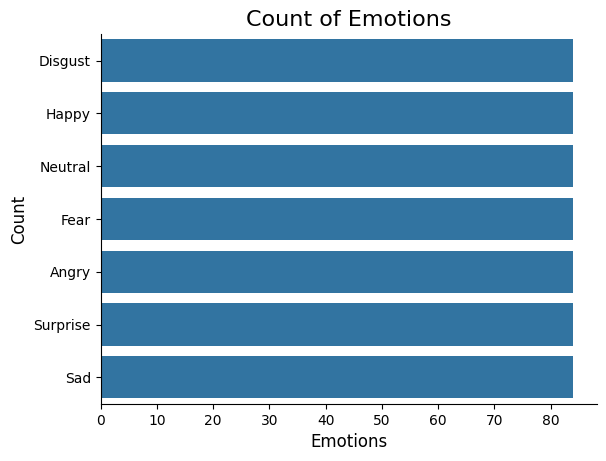

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [8]:
import librosa
import librosa.display
import IPython.display as ipd

data,sr = librosa.load(file_path[0])
sr

22050

In [9]:
ipd.Audio(data,rate=sr)

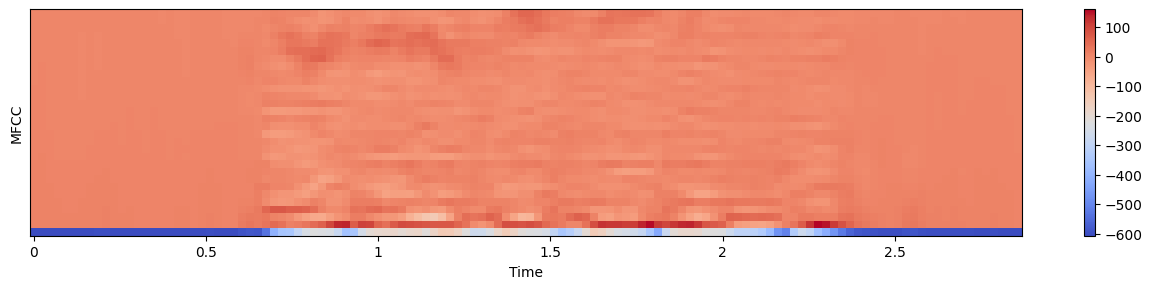

In [10]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [11]:
import numpy as np
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, n_steps=2.0):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

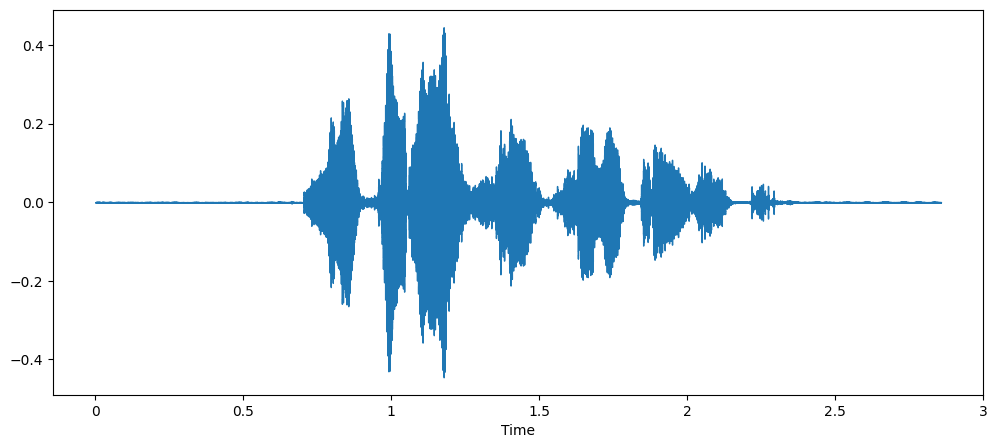

In [12]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

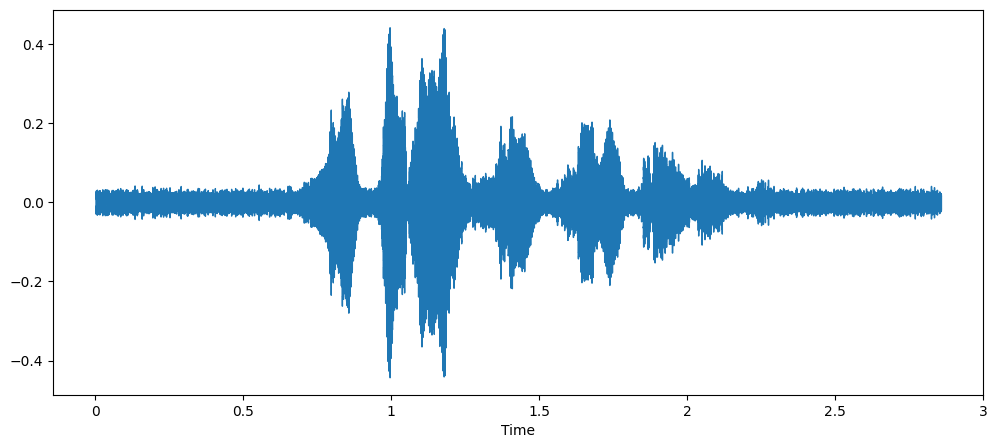

In [13]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

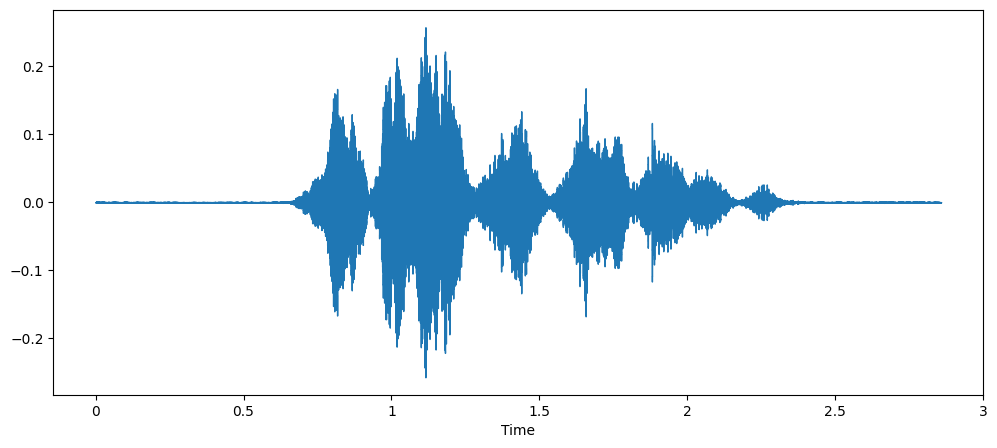

In [14]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

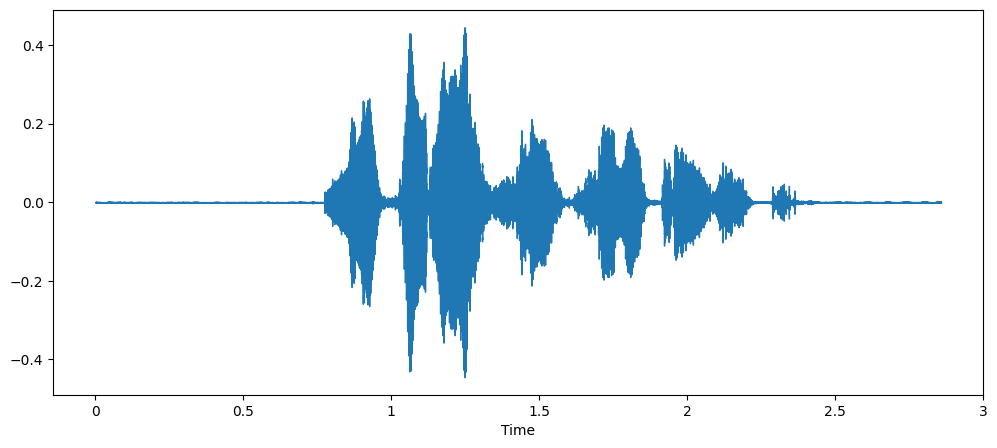

In [15]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [ ]:
import librosa
import numpy as np

def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def calculate_mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def calculate_chroma(data, sr, hop_length=512, flatten=True):
    chroma = librosa.feature.chroma_stft(y=data, sr=sr, hop_length=hop_length)
    return np.squeeze(chroma.T) if not flatten else np.ravel(chroma.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((
        result,
        calculate_chroma(data, sr, hop_length)
    ))
    return result

def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    aud = extract_features(data)
    audio = np.array(aud)
    
    # Add noise and extract features
    noised_audio = noise(data)
    aud2 = extract_features(noised_audio)
    audio = np.vstack((audio, aud2))
    
    # Add pitch shift and extract features
    pitched_audio = pitch(data, sr)
    aud3 = extract_features(pitched_audio)
    audio = np.vstack((audio, aud3))
    
    # Add pitch shift + noise and extract features
    pitched_audio1 = pitch(data, sr)
    pitched_noised_audio = noise(pitched_audio1)
    aud4 = extract_features(pitched_noised_audio)
    audio = np.vstack((audio, aud4))
    
    return audio

In [17]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  16


In [18]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%100==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)   

0it [00:00, ?it/s]

2it [00:00, 15.83it/s]

0 audio has been processed


105it [00:05, 19.91it/s]

100 audio has been processed


202it [00:11, 17.90it/s]

200 audio has been processed


303it [00:18, 13.39it/s]

300 audio has been processed


403it [00:25, 12.05it/s]

400 audio has been processed


504it [00:32, 17.46it/s]

500 audio has been processed


588it [00:36, 16.08it/s]

Done
Time:  36.57058359996881


In [19]:
len(X), len(Y), data_path.Path.shape

(2352, 2352, (588,))

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emovo_emotions_chroma.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2259,2260,2261,2262,2263,2264,2265,2266,2267,Emotions
0,0.031738,0.050781,0.081543,0.118164,0.127930,0.123047,0.106934,0.073730,0.065430,0.063965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disgust
1,0.263672,0.394531,0.520996,0.482910,0.389160,0.282715,0.177734,0.103027,0.086914,0.075684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disgust
2,0.035156,0.094727,0.164551,0.189941,0.184570,0.152832,0.109375,0.098145,0.100098,0.087402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disgust
3,0.249512,0.373047,0.484863,0.444824,0.344727,0.264160,0.178711,0.130371,0.120605,0.093262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disgust
4,0.021484,0.034180,0.073730,0.073242,0.068848,0.193359,0.219727,0.221191,0.233887,0.122559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disgust
